<a href="https://colab.research.google.com/github/guptasejallll4/Chompit-Repository/blob/main/Womensafetynightpatrolling_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving simulated_sos_alerts.csv to simulated_sos_alerts (1).csv
✅ Cleaned Dataset Preview:
                 Time  Hour       Day Time_of_Day       City  Latitude  \
0 2023-07-01 18:55:58    18  Saturday         Day      Delhi   28.6189   
1 2023-07-01 19:59:24    19  Saturday       Night      Delhi   28.6204   
2 2023-07-01 23:54:55    23  Saturday       Night    Kolkata   22.5703   
3 2023-07-01 19:27:11    19  Saturday       Night    Chennai   13.0985   
4 2023-07-01 18:55:49    18  Saturday         Day  Bangalore   12.9669   

   Longitude    Zone  Delay_Minutes       Alert_Type  
0    77.2076  Yellow              0     Panic Button  
1    77.2242  Yellow              0     Panic Button  
2    88.3616  Yellow              5  Route Deviation  
3    80.2784     Red              5     Panic Button  
4    77.6000     Red              0       Auto Alert  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column   

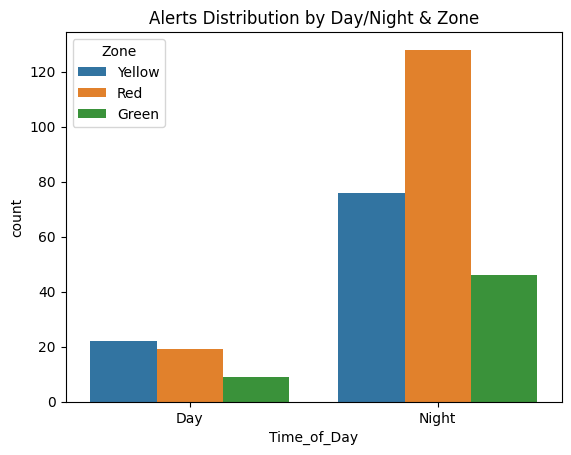

In [ ]:
# 📌 Women Safety Night Patrolling Prediction System
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset (Upload in Colab before running)
from google.colab import files
uploaded = files.upload()

# Replace with your uploaded filename
df = pd.read_csv("simulated_sos_alerts.csv")

# Step 3: Drop unnecessary ID columns
df = df.drop(columns=["Alert_ID", "User_ID"])

# Step 4: Convert Time column to datetime
df["Time"] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time"].dt.hour
df["Day"] = df["Time"].dt.day_name()

# Create a Day/Night feature
df["Time_of_Day"] = df["Hour"].apply(lambda x: "Night" if (x >= 19 or x <= 6) else "Day")

# Step 5: Rearrange columns for better readability
df = df[[
    "Time", "Hour", "Day", "Time_of_Day",
    "City", "Latitude", "Longitude", "Zone",
    "Delay_Minutes", "Alert_Type"
]]

# Step 6: Quick Check
print("✅ Cleaned Dataset Preview:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# Step 7: Example Visualization (Alerts by Time of Day)
sns.countplot(data=df, x="Time_of_Day", hue="Zone")
plt.title("Alerts Distribution by Day/Night & Zone")
plt.show()


Classification Report:
              precision    recall  f1-score   support

       Green       0.33      0.18      0.24        11
         Red       0.55      0.79      0.65        29
      Yellow       0.42      0.25      0.31        20

    accuracy                           0.50        60
   macro avg       0.43      0.41      0.40        60
weighted avg       0.46      0.50      0.46        60



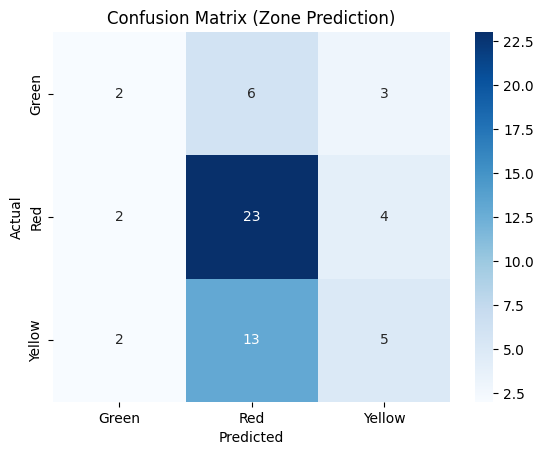

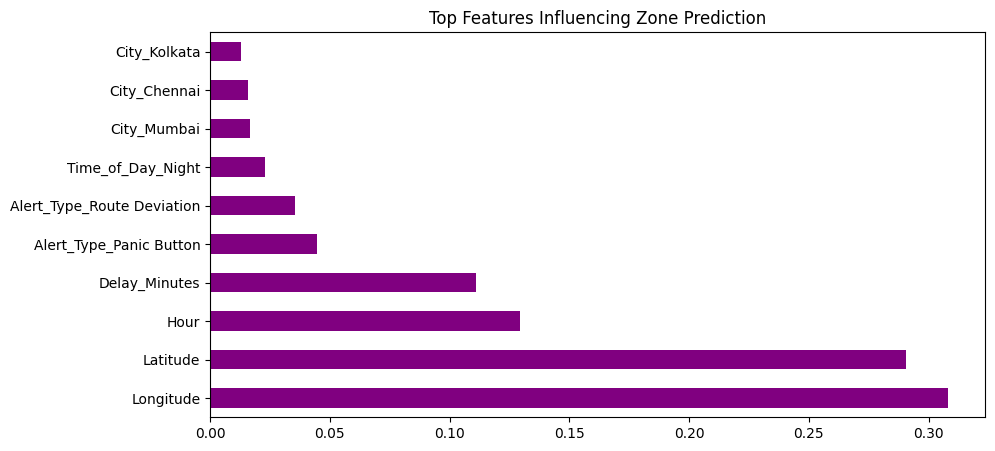

In [ ]:
# 📌 Women Safety Night Patrolling Prediction System
# 🚓 Classification Model (Predicting Zone: Red/Yellow)

# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Cleaned Dataset
df = pd.read_csv("simulated_sos_alerts.csv")
df = df.drop(columns=["Alert_ID", "User_ID"])
df["Time"] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time"].dt.hour
df["Day"] = df["Time"].dt.day_name()
df["Time_of_Day"] = df["Hour"].apply(lambda x: "Night" if (x >= 19 or x <= 6) else "Day")

# Step 3: Feature Selection
X = df[["Hour", "Day", "Time_of_Day", "City", "Latitude", "Longitude", "Alert_Type", "Delay_Minutes"]]
y = df["Zone"]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)  # Red=1, Yellow=0

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Train Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (Zone Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 8: Feature Importance (Which factors affect Zone most?)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', figsize=(10,5), color="purple")
plt.title("Top Features Influencing Zone Prediction")
plt.show()


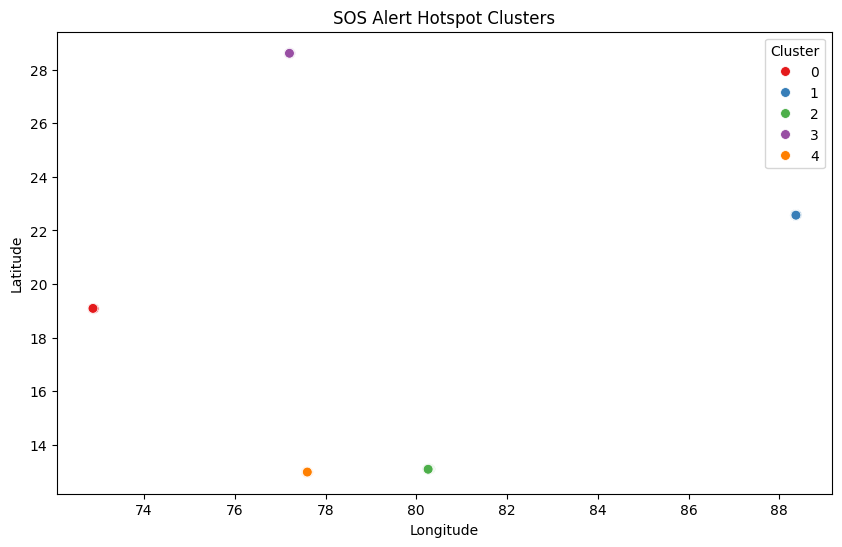

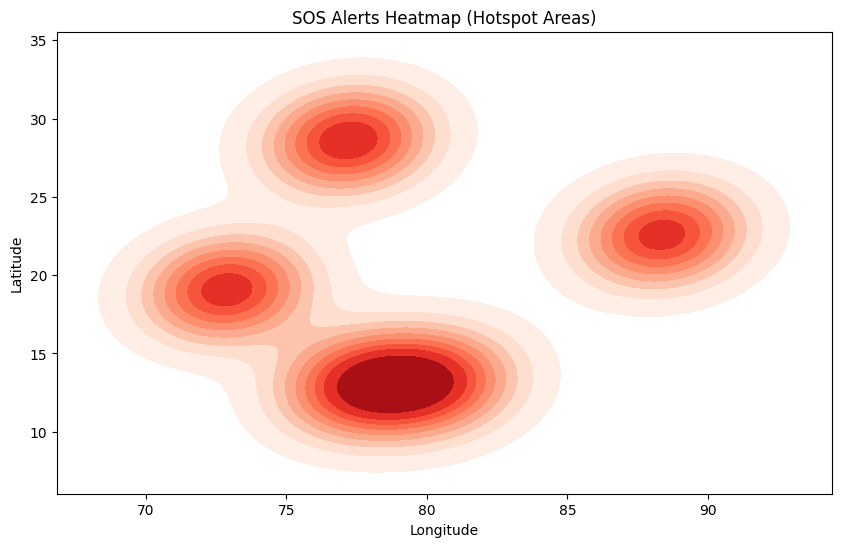

In [ ]:
# 📌 Women Safety Night Patrolling Prediction System
# 🚓 Clustering Model (Hotspot Detection)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 1: Load Cleaned Dataset
df = pd.read_csv("simulated_sos_alerts.csv")
df = df.drop(columns=["Alert_ID", "User_ID"])
df["Time"] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time"].dt.hour
df["Day"] = df["Time"].dt.day_name()
df["Time_of_Day"] = df["Hour"].apply(lambda x: "Night" if (x >= 19 or x <= 6) else "Day")

# Step 2: Select only Lat/Long for clustering
coords = df[["Latitude", "Longitude"]]

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can change number of clusters
df["Cluster"] = kmeans.fit_predict(coords)

# Step 4: Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="Cluster", palette="Set1", s=50)
plt.title("SOS Alert Hotspot Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()

# Step 5: Heatmap of Alerts Density
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Longitude", y="Latitude", fill=True, cmap="Reds", thresh=0.05)
plt.title("SOS Alerts Heatmap (Hotspot Areas)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


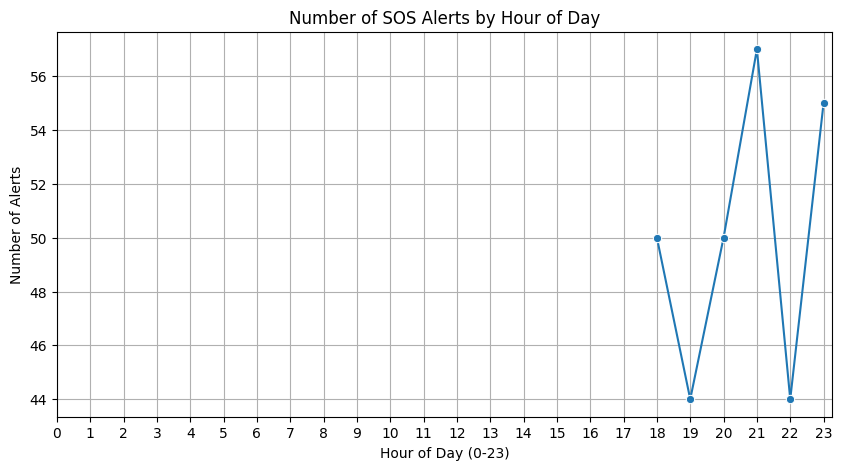

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observa

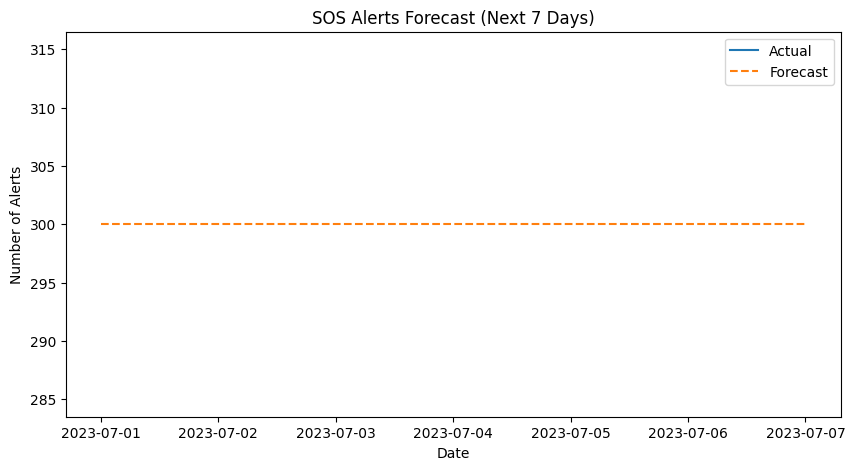

In [ ]:
# 📌 Women Safety Night Patrolling Prediction System
# 🚓 Time-Series Analysis (Predict Alerts by Time)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load Cleaned Dataset
df = pd.read_csv("simulated_sos_alerts.csv")
df = df.drop(columns=["Alert_ID", "User_ID"])
df["Time"] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time"].dt.hour
df["Date"] = df["Time"].dt.date

# Step 2: Aggregate Alerts by Hour
alerts_per_hour = df.groupby("Hour").size()

# Step 3: Plot Alerts by Hour
plt.figure(figsize=(10,5))
sns.lineplot(x=alerts_per_hour.index, y=alerts_per_hour.values, marker="o")
plt.title("Number of SOS Alerts by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Alerts")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

# Step 4: Prepare Time Series for ARIMA
# Aggregate alerts by Date (daily)
alerts_daily = df.groupby("Date").size()

# Step 5: Fit ARIMA Model (p=2, d=1, q=2 as example)
model = ARIMA(alerts_daily, order=(2,1,2))
model_fit = model.fit()

# Step 6: Forecast Next 7 Days
forecast = model_fit.forecast(steps=7)

# Step 7: Plot Forecast
plt.figure(figsize=(10,5))
plt.plot(alerts_daily.index, alerts_daily.values, label="Actual")
plt.plot(pd.date_range(start=alerts_daily.index[-1], periods=7, freq="D"), forecast, label="Forecast", linestyle="dashed")
plt.title("SOS Alerts Forecast (Next 7 Days)")
plt.xlabel("Date")
plt.ylabel("Number of Alerts")
plt.legend()
plt.show()


Saving simulated_sos_alerts.csv to simulated_sos_alerts (2).csv
✅ Data Loaded & Cleaned
                 Time       City  Latitude  Longitude    Zone  Delay_Minutes  \
0 2023-07-01 18:55:58      Delhi   28.6189    77.2076  Yellow              0   
1 2023-07-01 19:59:24      Delhi   28.6204    77.2242  Yellow              0   
2 2023-07-01 23:54:55    Kolkata   22.5703    88.3616  Yellow              5   
3 2023-07-01 19:27:11    Chennai   13.0985    80.2784     Red              5   
4 2023-07-01 18:55:49  Bangalore   12.9669    77.6000     Red              0   

        Alert_Type  Hour       Day        Date Time_of_Day  
0     Panic Button    18  Saturday  2023-07-01         Day  
1     Panic Button    19  Saturday  2023-07-01       Night  
2  Route Deviation    23  Saturday  2023-07-01       Night  
3     Panic Button    19  Saturday  2023-07-01       Night  
4       Auto Alert    18  Saturday  2023-07-01         Day  


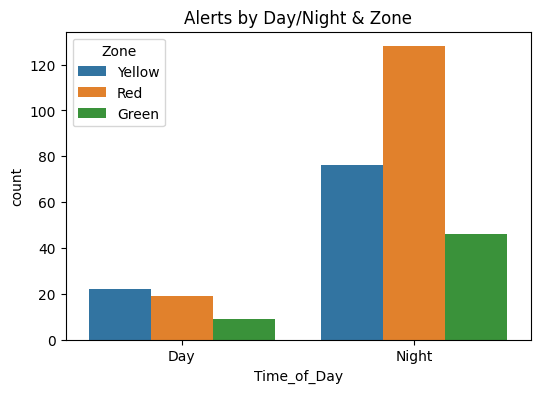

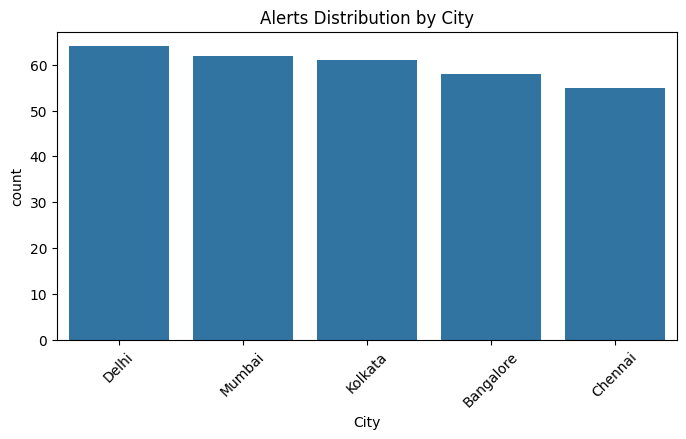

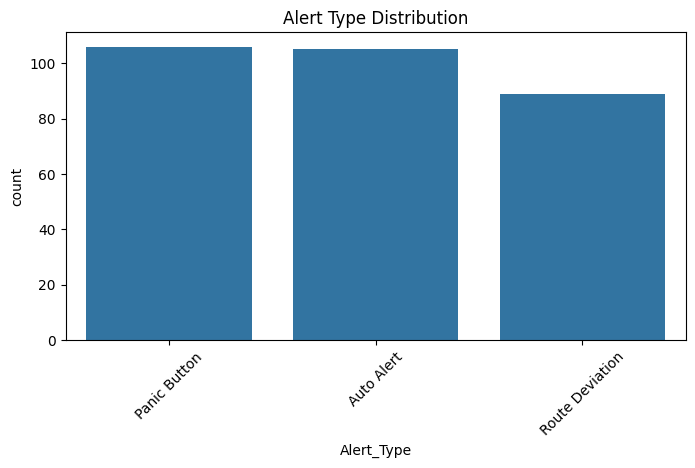


📊 Classification Report:
              precision    recall  f1-score   support

       Green       0.33      0.18      0.24        11
         Red       0.55      0.79      0.65        29
      Yellow       0.42      0.25      0.31        20

    accuracy                           0.50        60
   macro avg       0.43      0.41      0.40        60
weighted avg       0.46      0.50      0.46        60



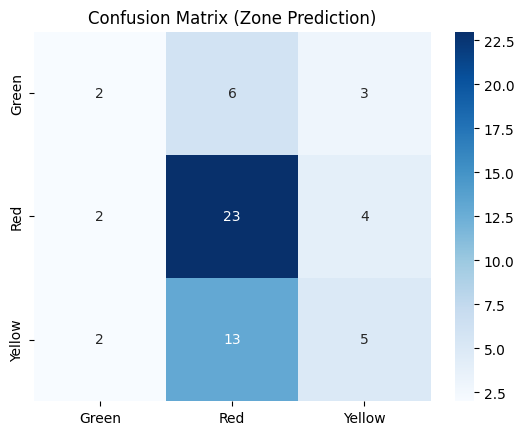

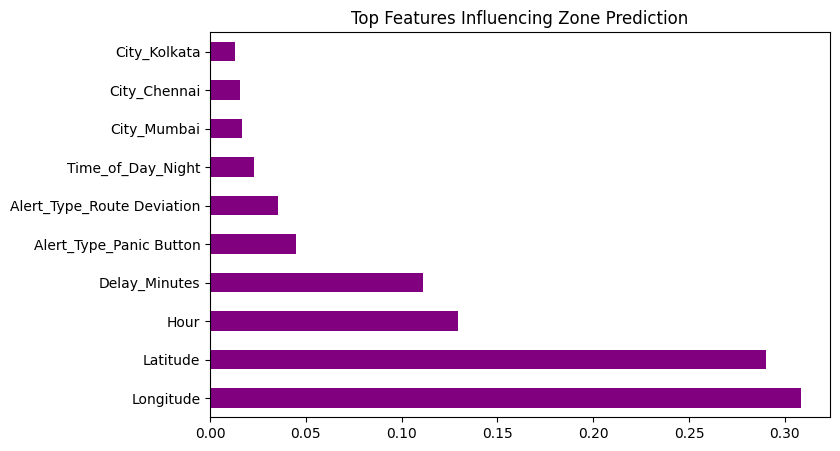

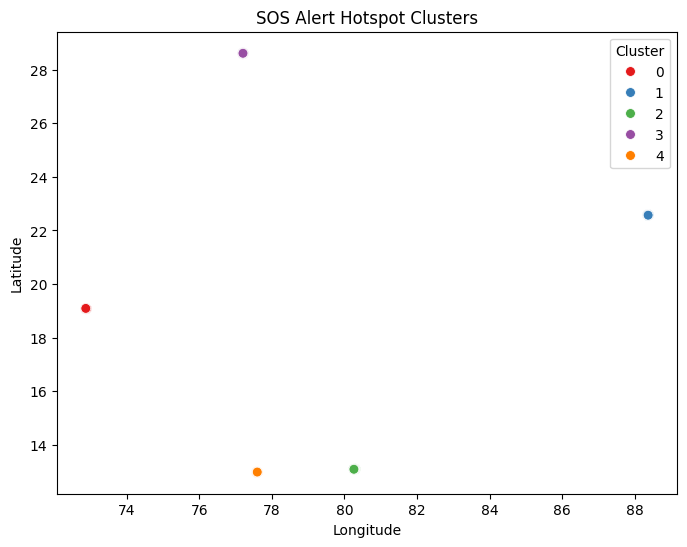

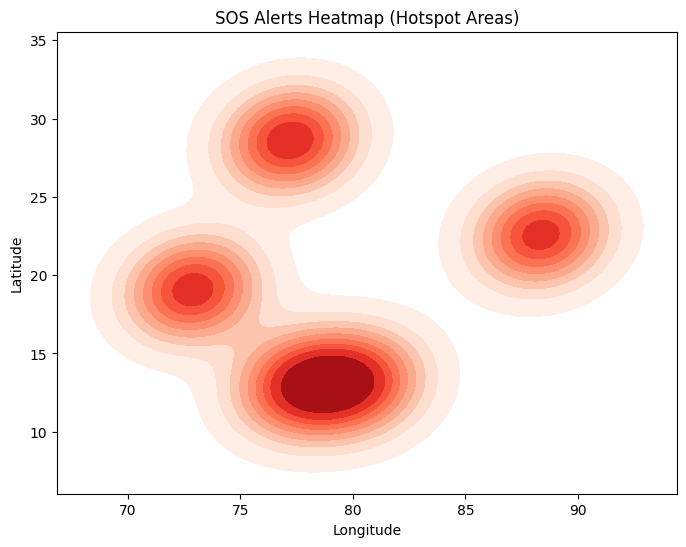

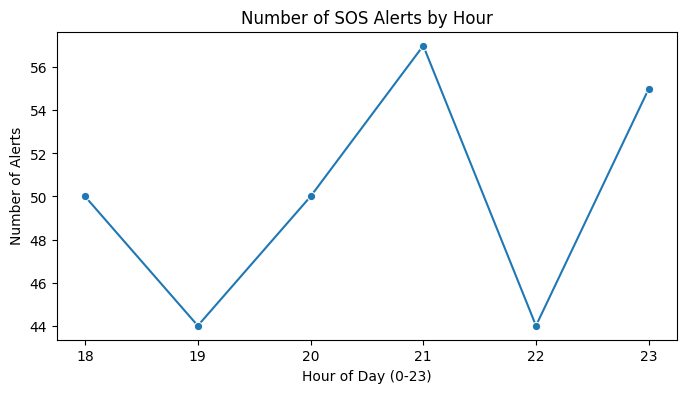

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observa

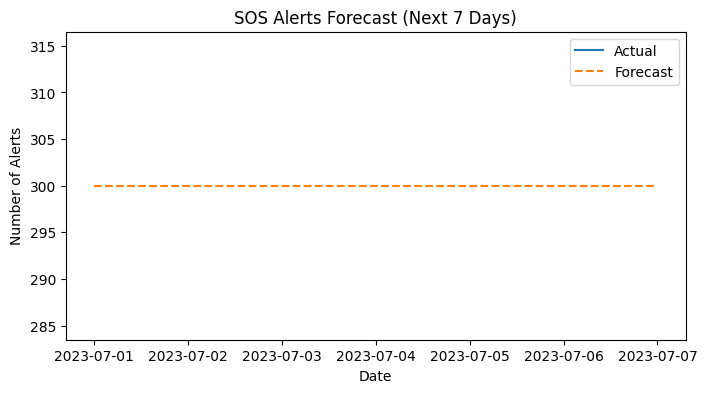

In [ ]:
# ==========================================
# Women Safety Night Patrolling Prediction System
# Full System: EDA + Classification + Clustering + Time-Series
# ==========================================

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA

# ==========================================
# Step 2: Load Dataset
# ==========================================
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("simulated_sos_alerts.csv")

# Drop unnecessary columns
df = df.drop(columns=["Alert_ID", "User_ID"])

# Time features
df["Time"] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time"].dt.hour
df["Day"] = df["Time"].dt.day_name()
df["Date"] = df["Time"].dt.date
df["Time_of_Day"] = df["Hour"].apply(lambda x: "Night" if (x >= 19 or x <= 6) else "Day")

print("✅ Data Loaded & Cleaned")
print(df.head())

# ==========================================
# Step 3: Exploratory Data Analysis (EDA)
# ==========================================

# Alerts by Time of Day
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Time_of_Day", hue="Zone")
plt.title("Alerts by Day/Night & Zone")
plt.show()

# Alerts by City
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="City", order=df["City"].value_counts().index)
plt.title("Alerts Distribution by City")
plt.xticks(rotation=45)
plt.show()

# Alerts by Type
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Alert_Type", order=df["Alert_Type"].value_counts().index)
plt.title("Alert Type Distribution")
plt.xticks(rotation=45)
plt.show()

# ==========================================
# Step 4: Classification (Zone Prediction)
# ==========================================
X = df[["Hour", "Day", "Time_of_Day", "City", "Latitude", "Longitude", "Alert_Type", "Delay_Minutes"]]
y = df["Zone"]

# Encode
X = pd.get_dummies(X, drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (Zone Prediction)")
plt.show()

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind="barh", figsize=(8,5), color="purple")
plt.title("Top Features Influencing Zone Prediction")
plt.show()

# ==========================================
# Step 5: Clustering (Hotspot Detection)
# ==========================================
coords = df[["Latitude", "Longitude"]]

kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(coords)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="Cluster", palette="Set1", s=50)
plt.title("SOS Alert Hotspot Clusters")
plt.show()

# Heatmap of Density
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x="Longitude", y="Latitude", fill=True, cmap="Reds", thresh=0.05)
plt.title("SOS Alerts Heatmap (Hotspot Areas)")
plt.show()

# ==========================================
# Step 6: Time-Series Forecasting
# ==========================================
# Alerts per Hour
alerts_per_hour = df.groupby("Hour").size()
plt.figure(figsize=(8,4))
sns.lineplot(x=alerts_per_hour.index, y=alerts_per_hour.values, marker="o")
plt.title("Number of SOS Alerts by Hour")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Alerts")
plt.show()

# Daily Alerts for ARIMA
alerts_daily = df.groupby("Date").size()

model = ARIMA(alerts_daily, order=(2,1,2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=7)

plt.figure(figsize=(8,4))
plt.plot(alerts_daily.index, alerts_daily.values, label="Actual")
plt.plot(pd.date_range(start=alerts_daily.index[-1], periods=7, freq="D"), forecast, label="Forecast", linestyle="dashed")
plt.title("SOS Alerts Forecast (Next 7 Days)")
plt.xlabel("Date")
plt.ylabel("Number of Alerts")
plt.legend()
plt.show()


In [ ]:
# 📌 Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# 📌 Step 2: Load original dataset (upload again if needed)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("simulated_sos_alerts.csv")  # your original dataset file name

# 📌 Step 3: Basic cleaning and feature engineering (consistent with previous cells)
df = df.drop(columns=["Alert_ID", "User_ID"])
df["Time"] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time"].dt.hour
df["Day"] = df["Time"].dt.day_name()
df["Time_of_Day"] = df["Hour"].apply(lambda x: "Night" if (x >= 19 or x <= 6) else "Day")
df = df.dropna()
df = df.drop_duplicates()


# 📌 Step 4: Encode categorical columns
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['Alert_Type'] = le.fit_transform(df['Alert_Type'])
df['Time_of_Day'] = le.fit_transform(df['Time_of_Day'])


# Features and target
X = df[['City','Alert_Type','Time_of_Day', 'Hour', 'Latitude', 'Longitude', 'Delay_Minutes']] # Include relevant features
y = df['Zone']  # Target

# Encode target variable
le_zone = LabelEncoder()
y = le_zone.fit_transform(y)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 5: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

# 📌 Step 6: Train, predict & evaluate all models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 {name} Results:")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_zone.classes_))
    results[name] = acc

# 📊 Step 7: Compare accuracies
print("\n📊 Accuracy Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.2f}")

KeyboardInterrupt: 

In [ ]:
import pandas as pd

df = pd.read_csv("simulated_sos_alerts (3).csv")
print(df.columns)
df.head()


Index(['Alert_ID', 'User_ID', 'Time', 'City', 'Latitude', 'Longitude', 'Zone',
       'Delay_Minutes', 'Alert_Type'],
      dtype='object')


,Alert_ID,User_ID,Time,City,Latitude,Longitude,Zone,Delay_Minutes,Alert_Type
0,A0001,U2824,2023-07-01 18:55:58,Delhi,28.6189,77.2076,Yellow,0,Panic Button
1,A0002,U9935,2023-07-01 19:59:24,Delhi,28.6204,77.2242,Yellow,0,Panic Button
2,A0003,U4811,2023-07-01 23:54:55,Kolkata,22.5703,88.3616,Yellow,5,Route Deviation
3,A0004,U9928,2023-07-01 19:27:11,Chennai,13.0985,80.2784,Red,5,Panic Button
4,A0005,U7924,2023-07-01 18:55:49,Bangalore,12.9669,77.6000,Red,0,Auto Alert



🔹 Logistic Regression Results:
Accuracy: 0.48333333333333334
Confusion Matrix:
 [[ 0 11  1]
 [ 0 28  2]
 [ 0 17  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.93      0.65        30
           2       0.25      0.06      0.09        18

    accuracy                           0.48        60
   macro avg       0.25      0.33      0.25        60
weighted avg       0.33      0.48      0.35        60


🔹 Decision Tree Results:
Accuracy: 0.31666666666666665
Confusion Matrix:
 [[ 1  8  3]
 [ 7 11 12]
 [ 6  5  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.08      0.08        12
           1       0.46      0.37      0.41        30
           2       0.32      0.39      0.35        18

    accuracy                           0.32        60
   macro avg       0.28      0.28      0.28        60
weighted avg   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Random Forest Results:
Accuracy: 0.3333333333333333
Confusion Matrix:
 [[ 1 10  1]
 [ 5 15 10]
 [ 4 10  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.08      0.09        12
           1       0.43      0.50      0.46        30
           2       0.27      0.22      0.24        18

    accuracy                           0.33        60
   macro avg       0.27      0.27      0.26        60
weighted avg       0.31      0.33      0.32        60


🔹 KNN Results:
Accuracy: 0.3333333333333333
Confusion Matrix:
 [[ 2  7  3]
 [ 6 16  8]
 [ 3 13  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.17      0.17        12
           1       0.44      0.53      0.48        30
           2       0.15      0.11      0.13        18

    accuracy                           0.33        60
   macro avg       0.26      0.27      0.26        60
weighted avg       0.30      0.33

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

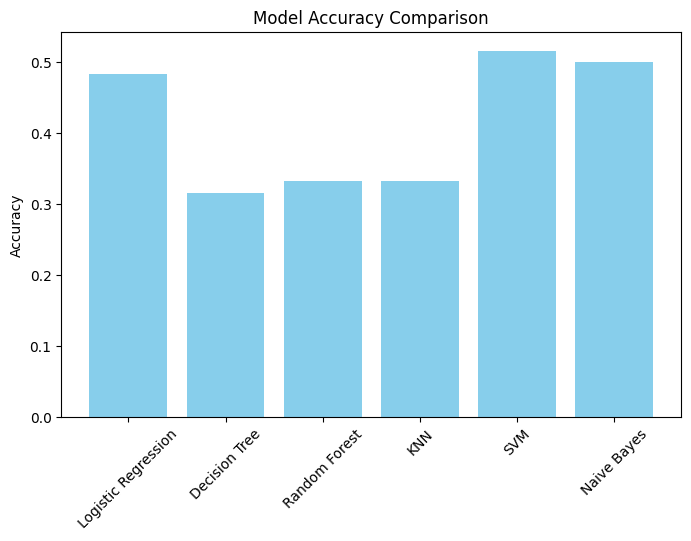

In [ ]:
# 📌 Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# 📌 Step 2: Load dataset
df = pd.read_csv("simulated_sos_alerts (3).csv")

# 📌 Step 3: Feature engineering
# Extract hour from Time for better prediction
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

# Encode categorical variables
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['Alert_Type'] = le.fit_transform(df['Alert_Type'])
df['Zone'] = le.fit_transform(df['Zone'])  # Target (0=Yellow, 1=Red etc.)

# 📌 Step 4: Define features and target
X = df[['City','Alert_Type','Hour','Delay_Minutes']]
y = df['Zone']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 5: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

# 📌 Step 6: Train, predict & evaluate all models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 {name} Results:")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    results[name] = acc

# 📊 Step 7: Accuracy comparison chart
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color="skyblue")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()
